# **Sentiment Analysis on BISA AI Mobile App Reviews**

Yohanes Setiawan

Surabaya, Indonesia

yoh.set95@gmail.com

# **Business Understanding**

## Introduction

* BISA AI is an Indonesian start-up which provides products and services of Artificial Intelligence (AI) starting from 2019
* BISA AI also has BISA AI Academy as an education platform for Data Science and Full Stack Programming
* BISA AI Academy has its own Android application which can be downloaded through Google Play which provides several free courses

## Problem Statement
BISA AI wants to evaluate performance of its Android application 

## Goal
To give feedbacks to BISA AI about BISA AI Academy's Android application for better future performance

## Research Questions
* How to make sentiment analysis for BISA AI Academy application?
* How to evaluate the result of sentiment analysis for BISA AI Academy application?

## Objective Statements
* Designing sentiment analysis for BISA AI Academy application
* Get insights from the result of sentiment analysis for BISA AI Academy

# **Analytical Approach**

* Descriptive analysis
* Graph analysis
* Table analysis
* Sentiment analysis

# **Data Understanding**

* The dataset is about user reviews toward BISA AI application on Playstore

Various features in the dataset:
- Package Name
- App Version Code
- App Version Name
- Reviewer Language (eng/English or id/Bahasa Indonesia)
- Device
- Review Submit Date and Time
- Review Submit Millis Since Epoch
- Review Last Update Date and Time
- Review Last Update Millis Since Epoch
- Star Rating : rating given by users
- Review Title
- Review Text : user reviews (in eng or id)
- Developer Reply Date and Time
- Developer Reply Millis Since Epoch
- Developer Reply Text
- Review Link

## Load Data

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 2.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# Saran
!pip install emoji

     |████████████████████████████████| 175 kB 6.7 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=37da0c2d19dc75c4d6cd5d121af71e2480162d735e48d30edda0afc483c98882
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
pip install Sastrawi

     |████████████████████████████████| 209 kB 5.0 MB/s 


In [ ]:
pip install kbbi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import emoji
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
xlsx = pd.ExcelFile("/content/drive/MyDrive/OJT BISA AI/REVIEW GOOGLE/BISA_AI.xlsx") #method ExcelFile
rev_sheets = [] #list kosong
for sheet in xlsx.sheet_names:
   rev_sheets.append(xlsx.parse(sheet))
pd_rev = pd.concat(rev_sheets).reset_index(drop=True)
pd_rev.head()

,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,"Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Repl",Column1,_1,_2,_3,_4,_5,_6
0,com.pos.bisaaiacademy,NaN,NaN,en,j7velte,2020-07-17 01:57:53,1.594926e+12,2020-07-17 01:57:53,1.594926e+12,5.0,NaN,Great apps. We can learn AI Online now,2020-09-07 13:20:20,1.599460e+12,"Hai Premier Optima Sattiga, Terima kasih atas ...",http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,com.pos.bisaaiacademy,NaN,NaN,en,j7velte,2020-07-17 01:58:38,1.594926e+12,2020-07-17 01:58:38,1.594926e+12,5.0,NaN,Sangat bermanfaat. Bisa belajar online sekaran...,2020-09-07 13:19:49,1.599460e+12,"Hai Octaviano, Terima kasih atas ulasannya. Te...",http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,com.pos.bisaaiacademy,10.0,1001.0,id,beryllium,2020-07-17 08:58:36,1.594951e+12,2020-07-17 08:58:36,1.594951e+12,5.0,NaN,Aplikasinya bagus dan sangat membantu pembelaj...,2020-09-07 13:19:26,1.599460e+12,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...",http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,com.pos.bisaaiacademy,10.0,1001.0,en,j8y18lte,2020-07-17 09:00:01,1.594951e+12,2020-07-17 09:01:03,1.594951e+12,5.0,NaN,Great app! Has a very friendly user interface ...,2020-09-07 13:19:02,1.599460e+12,"Hai Arya Dandaka, Terima kasih atas ulasannya....",http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,com.pos.bisaaiacademy,10.0,1001.0,en,ginkgo,2020-07-17 09:17:15,1.594952e+12,2020-07-17 09:17:15,1.594952e+12,5.0,NaN,sangat bagus untuk para pemula dan yang mau la...,2020-09-07 13:18:43,1.599460e+12,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...",http://play.google.com/console/developers/5503...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset Information

In [ ]:
pd_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 24 columns):
 #   Column                                                                                                                                                                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                                           --------------  -----         
 0   Package Name                                                                                                                                                                                                                                                     271 non-null    object        
 1   App Version

# **Data Cleaning**

## Selecting appropriate columns

In [ ]:
pd_rev = pd_rev[["App Version Name","Review Last Update Date and Time","Star Rating","Review Text","Developer Reply Text"]]
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text
0,NaN,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ..."
1,NaN,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te..."
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny..."
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya...."
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny..."


In [ ]:
pd_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   App Version Name                  214 non-null    float64       
 1   Review Last Update Date and Time  271 non-null    datetime64[ns]
 2   Star Rating                       271 non-null    float64       
 3   Review Text                       206 non-null    object        
 4   Developer Reply Text              126 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 12.9+ KB


## Checking Missing Values

In [ ]:
print("Missing Value from the Dataset for each column in pd_rev: ")
print(pd_rev.isnull().sum())

Missing Value from the Dataset for each column in pd_rev: 
App Version Name                    112
Review Last Update Date and Time     55
Star Rating                          55
Review Text                         120
Developer Reply Text                200
dtype: int64


## Handling Missing Values

* Removing 55 missing "Star Rating" rows

In [ ]:
pd_rev = pd_rev[~pd_rev[['Star Rating']].isnull().any(axis=1)]
pd_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 270
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   App Version Name                  214 non-null    float64       
 1   Review Last Update Date and Time  271 non-null    datetime64[ns]
 2   Star Rating                       271 non-null    float64       
 3   Review Text                       206 non-null    object        
 4   Developer Reply Text              126 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 12.7+ KB


In [ ]:
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text
0,NaN,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ..."
1,NaN,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te..."
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny..."
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya...."
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny..."


In [ ]:
pd_rev.tail()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text
266,2006.0,2021-07-26 07:55:35,5.0,Cukup bermanfaat dalam pelatihan saya dalam be...,NaN
267,2006.0,2021-07-26 07:56:14,5.0,Easy to use! Aplikasi yang sangat bagus diguna...,NaN
268,2006.0,2021-07-26 07:57:29,5.0,NaN,NaN
269,2006.0,2021-07-26 12:18:17,5.0,Aplikasi yang dapat mendukung belajar,NaN
270,2006.0,2021-07-28 11:39:26,4.0,Habis daftar kok nggk bisa login? Katanya suru...,NaN


* Impute missing value in "App Version Name" with after Non-Missing Values

In [ ]:
pd_rev['App Version Name']=pd_rev['App Version Name'].fillna(method='bfill')

In [ ]:
pd_rev

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ..."
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te..."
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny..."
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya...."
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny..."
5,1001.0,2020-07-17 09:22:02,5.0,Sangat Membantu sekali dalam pembelajaran meng...,"Hai Ichsan Eka Pratama, Terima kasih atas ulas..."
6,1001.0,2020-07-17 09:33:32,5.0,"Sangat mudah dipahami, aplikasi juga user frie...","Hai Alfi Salim, Terima kasih atas ulasannya. T..."
7,1001.0,2020-07-17 09:42:26,5.0,Mantul,"Hai Waktu, Terima kasih atas ulasannya. Terus ..."
8,1001.0,2020-07-17 09:44:10,5.0,Aplikasi bermanfaat untuk media pembelajaran e...,"Hai Oktafiando, Terima kasih atas ulasannya. T..."
9,1001.0,2020-07-17 09:49:51,5.0,Huhuu akhirnya ada platform buat belajar AI,"Hai Naufal Fawwaz Andriawan, Terima kasih atas..."


In [ ]:
print("Updated Missing Value from the Dataset for each column in pd_rev: ")
print(pd_rev.isnull().sum())

Updated Missing Value from the Dataset for each column in pd_rev: 
App Version Name                      0
Review Last Update Date and Time      0
Star Rating                           0
Review Text                          65
Developer Reply Text                145
dtype: int64


* Impute missing value in "Review Text" and "Developer Reply Text" with "None"

In [ ]:
pd_rev[['Review Text','Developer Reply Text']]=pd_rev[['Review Text','Developer Reply Text']].fillna("None")
pd_rev.tail()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text
266,2006.0,2021-07-26 07:55:35,5.0,Cukup bermanfaat dalam pelatihan saya dalam be...,None
267,2006.0,2021-07-26 07:56:14,5.0,Easy to use! Aplikasi yang sangat bagus diguna...,None
268,2006.0,2021-07-26 07:57:29,5.0,None,None
269,2006.0,2021-07-26 12:18:17,5.0,Aplikasi yang dapat mendukung belajar,None
270,2006.0,2021-07-28 11:39:26,4.0,Habis daftar kok nggk bisa login? Katanya suru...,None


In [ ]:
print("Updated Missing Value from the Dataset for each column in pd_rev: ")
print(pd_rev.isnull().sum())

Updated Missing Value from the Dataset for each column in pd_rev: 
App Version Name                    0
Review Last Update Date and Time    0
Star Rating                         0
Review Text                         0
Developer Reply Text                0
dtype: int64


## Checking Duplicated Data

In [ ]:
pd_rev.duplicated().sum()

0

Therefore, there is no duplicated data in this dataset

## Text Pre-processing

In [ ]:
# Untuk reset saja
del pd_rev['Review']

In [ ]:
# Make a copy to the column
pd_rev['Review'] = pd_rev['Review Text'].copy()

In [ ]:
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...",Great apps. We can learn AI Online now
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...",Sangat bermanfaat. Bisa belajar online sekaran...
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...",Aplikasinya bagus dan sangat membantu pembelaj...
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....",Great app! Has a very friendly user interface ...
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...",sangat bagus untuk para pemula dan yang mau la...


### Case Folding

In [ ]:
pd_rev.loc[:, 'Review'] = pd_rev.loc[:, 'Review'].str.lower()

In [ ]:
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...",great apps. we can learn ai online now
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...",sangat bermanfaat. bisa belajar online sekaran...
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...",aplikasinya bagus dan sangat membantu pembelaj...
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....",great app! has a very friendly user interface ...
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...",sangat bagus untuk para pemula dan yang mau la...


### Removing Punctuations, Whitespace, Special Characters

In [ ]:
def punct(words):
  regex = re.compile('[%s]'% re.escape(string.punctuation))
  result = regex.sub(" ",words)
  return result

def extra_space(words):
  return " ".join(words.split())

def num(words):
  return re.sub(r"\d+","",words)

def remove_emoji(words):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', words)

def convert_emoticons(text):
    return emoji.demojize(text, delimiters=(" ", " "))

In [ ]:
# Convert Emoticons
pd_rev['Review'] = pd_rev['Review'].apply(lambda x: convert_emoticons(x))

In [ ]:
pd_rev

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...",great apps. we can learn ai online now
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...",sangat bermanfaat. bisa belajar online sekaran...
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...",aplikasinya bagus dan sangat membantu pembelaj...
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....",great app! has a very friendly user interface ...
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...",sangat bagus untuk para pemula dan yang mau la...
5,1001.0,2020-07-17 09:22:02,5.0,Sangat Membantu sekali dalam pembelajaran meng...,"Hai Ichsan Eka Pratama, Terima kasih atas ulas...",sangat membantu sekali dalam pembelajaran meng...
6,1001.0,2020-07-17 09:33:32,5.0,"Sangat mudah dipahami, aplikasi juga user frie...","Hai Alfi Salim, Terima kasih atas ulasannya. T...","sangat mudah dipahami, aplikasi juga user frie..."
7,1001.0,2020-07-17 09:42:26,5.0,Mantul,"Hai Waktu, Terima kasih atas ulasannya. Terus ...",mantul
8,1001.0,2020-07-17 09:44:10,5.0,Aplikasi bermanfaat untuk media pembelajaran e...,"Hai Oktafiando, Terima kasih atas ulasannya. T...",aplikasi bermanfaat untuk media pembelajaran e...
9,1001.0,2020-07-17 09:49:51,5.0,Huhuu akhirnya ada platform buat belajar AI,"Hai Naufal Fawwaz Andriawan, Terima kasih atas...",huhuu akhirnya ada platform buat belajar ai


In [ ]:
# Remove Punctuation
pd_rev['Review'] = pd_rev['Review'].apply(lambda x: punct(x))

In [ ]:
pd_rev

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...",great apps we can learn ai online now
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...",sangat bermanfaat bisa belajar online sekaran...
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...",aplikasinya bagus dan sangat membantu pembelaj...
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....",great app has a very friendly user interface ...
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...",sangat bagus untuk para pemula dan yang mau la...
5,1001.0,2020-07-17 09:22:02,5.0,Sangat Membantu sekali dalam pembelajaran meng...,"Hai Ichsan Eka Pratama, Terima kasih atas ulas...",sangat membantu sekali dalam pembelajaran meng...
6,1001.0,2020-07-17 09:33:32,5.0,"Sangat mudah dipahami, aplikasi juga user frie...","Hai Alfi Salim, Terima kasih atas ulasannya. T...",sangat mudah dipahami aplikasi juga user frie...
7,1001.0,2020-07-17 09:42:26,5.0,Mantul,"Hai Waktu, Terima kasih atas ulasannya. Terus ...",mantul
8,1001.0,2020-07-17 09:44:10,5.0,Aplikasi bermanfaat untuk media pembelajaran e...,"Hai Oktafiando, Terima kasih atas ulasannya. T...",aplikasi bermanfaat untuk media pembelajaran e...
9,1001.0,2020-07-17 09:49:51,5.0,Huhuu akhirnya ada platform buat belajar AI,"Hai Naufal Fawwaz Andriawan, Terima kasih atas...",huhuu akhirnya ada platform buat belajar ai


In [ ]:
# Remove Extra Space
pd_rev['Review'] = pd_rev['Review'].apply(lambda x: extra_space(x))

In [ ]:
pd_rev

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...",great apps we can learn ai online now
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...",sangat bermanfaat bisa belajar online sekarang...
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...",aplikasinya bagus dan sangat membantu pembelaj...
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....",great app has a very friendly user interface a...
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...",sangat bagus untuk para pemula dan yang mau la...
5,1001.0,2020-07-17 09:22:02,5.0,Sangat Membantu sekali dalam pembelajaran meng...,"Hai Ichsan Eka Pratama, Terima kasih atas ulas...",sangat membantu sekali dalam pembelajaran meng...
6,1001.0,2020-07-17 09:33:32,5.0,"Sangat mudah dipahami, aplikasi juga user frie...","Hai Alfi Salim, Terima kasih atas ulasannya. T...",sangat mudah dipahami aplikasi juga user frien...
7,1001.0,2020-07-17 09:42:26,5.0,Mantul,"Hai Waktu, Terima kasih atas ulasannya. Terus ...",mantul
8,1001.0,2020-07-17 09:44:10,5.0,Aplikasi bermanfaat untuk media pembelajaran e...,"Hai Oktafiando, Terima kasih atas ulasannya. T...",aplikasi bermanfaat untuk media pembelajaran e...
9,1001.0,2020-07-17 09:49:51,5.0,Huhuu akhirnya ada platform buat belajar AI,"Hai Naufal Fawwaz Andriawan, Terima kasih atas...",huhuu akhirnya ada platform buat belajar ai


In [ ]:
# Remove Numbers
pd_rev['Review'] = pd_rev['Review'].apply(lambda x: num(x))
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...",great apps we can learn ai online now
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...",sangat bermanfaat bisa belajar online sekarang...
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...",aplikasinya bagus dan sangat membantu pembelaj...
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....",great app has a very friendly user interface a...
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...",sangat bagus untuk para pemula dan yang mau la...


In [ ]:
import emoji
print(emoji.demojize("nice apps 💥"))

nice apps :collision:


In [ ]:
# Remove Emoji
pd_rev['Review'] = pd_rev['Review'].apply(lambda x: remove_emoji(x))

In [ ]:
pd_rev

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...",great apps we can learn ai online now
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...",sangat bermanfaat bisa belajar online sekarang...
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...",aplikasinya bagus dan sangat membantu pembelaj...
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....",great app has a very friendly user interface a...
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...",sangat bagus untuk para pemula dan yang mau la...
5,1001.0,2020-07-17 09:22:02,5.0,Sangat Membantu sekali dalam pembelajaran meng...,"Hai Ichsan Eka Pratama, Terima kasih atas ulas...",sangat membantu sekali dalam pembelajaran meng...
6,1001.0,2020-07-17 09:33:32,5.0,"Sangat mudah dipahami, aplikasi juga user frie...","Hai Alfi Salim, Terima kasih atas ulasannya. T...",sangat mudah dipahami aplikasi juga user frien...
7,1001.0,2020-07-17 09:42:26,5.0,Mantul,"Hai Waktu, Terima kasih atas ulasannya. Terus ...",mantul
8,1001.0,2020-07-17 09:44:10,5.0,Aplikasi bermanfaat untuk media pembelajaran e...,"Hai Oktafiando, Terima kasih atas ulasannya. T...",aplikasi bermanfaat untuk media pembelajaran e...
9,1001.0,2020-07-17 09:49:51,5.0,Huhuu akhirnya ada platform buat belajar AI,"Hai Naufal Fawwaz Andriawan, Terima kasih atas...",huhuu akhirnya ada platform buat belajar ai


### Tokenization

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from kbbi import KBBI

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pd_rev['Review'] = pd_rev['Review'].apply(word_tokenize) 
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...","[great, apps, we, can, learn, ai, online, now]"
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...","[sangat, bermanfaat, bisa, belajar, online, se..."
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...","[aplikasinya, bagus, dan, sangat, membantu, pe..."
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....","[great, app, has, a, very, friendly, user, int..."
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...","[sangat, bagus, untuk, para, pemula, dan, yang..."


### Spelling Check and Correction

In [ ]:
found = []
not_found = []
try:
  found.append(KBBI("ada"))
  found.append(KBBI("hantu"))
except:
  not_found.append("wis")
print('Ditemukan ', found)
print('Tidak ditemukan ', not_found)

Ditemukan  [<KBBI: ada>, <KBBI: hantu>]
Tidak ditemukan  []


In [ ]:
np.savetxt("file_name.csv", found, delimiter=",", fmt='%s')

In [ ]:
import csv
with open('found.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    employee_writer.writerow(found)

In [ ]:
def add_spelling(words, found, not_found):
  for word in words:
    try:
      found.append(KBBI(word))
    except:
      not_found.append(word)
  print('It works!')

In [ ]:
# Spelling check
found = []
not_found = []
pd_rev['Review'].apply(lambda x: add_spelling(x, found, not_found))

In [ ]:
not_found = pd.DataFrame(not_found)

In [ ]:
not_found.head()

,0
0,great
1,apps
2,can
3,learn
4,online


In [ ]:
not_found.to_csv('not_found.csv', index=False)

In [ ]:
def convertToSlangword(review):
    kamus_slangword = eval(open("/content/drive/MyDrive/OJT BISA AI/slang_dictionary.txt").read()) # Membuka dictionary slangword
    pattern = re.compile(r'\b( ' + '|'.join(kamus_slangword.keys())+r')\b') # Search pola kata (contoh kpn -> kapan)
    content = []
    for kata in review:
        filteredSlang = pattern.sub(lambda x: kamus_slangword[x.group()],kata) # Replace slangword berdasarkan pola review yg telah ditentukan
        content.append(filteredSlang)
    review = content
    return review

In [ ]:
def slangWordUpdate(sentence_list):
  # make a place where we can build our new sentence
  new_sentence = []
  APPOSTOPHES = eval(open("/content/drive/MyDrive/OJT BISA AI/slang_dictionary_updated.txt").read()) # Membuka dictionary slangword
  key = list(APPOSTOPHES.keys())
  # look through each word 
  for word in sentence_list:
      # look for each candidate
      for candidate_replacement in key:
          # if our candidate is there in the word
          if candidate_replacement == word:
              # replace it 
              word = APPOSTOPHES[candidate_replacement]
      # and pop it onto a new list 
      new_sentence.append(word)
  updated_slang = new_sentence
  return updated_slang

In [ ]:
# Spelling Correction
coba = pd_rev['Review'].apply(lambda x: slangWordUpdate(x))
coba.head()

0    [great, application, we, can, learn, ai, onlin...
1    [sangat, manfaat, bisa, ajar, online, sekarang...
2    [aplikasi, bagus, dan, sangat, bantu, ajar, saya]
3    [great, application, has, a, very, friendly, u...
4    [sangat, bagus, untuk, para, pemula, dan, yang...
Name: Review, dtype: object

In [ ]:
# Spelling Correction
pd_rev['Review'] = pd_rev['Review'].apply(lambda x: convertToSlangword(x))
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...","[great, apps, learn, ai, online]"
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...","[sangat, manfaat, bisa, ajar, online, sekarang..."
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...","[aplikasi, bagus, dan, sangat, bantu, ajar, saya]"
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....","[great, aplikasi, friendly, user, interface, e..."
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...","[sangat, bagus, untuk, para, pemula, dan, yang..."


### Stopword Removal

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
# English
def eng_stopword_removal(word):
  listStopwords = set(stopwords.words('english'))
  cleaned_words = []
  for w in word:
    if w not in listStopwords:
      cleaned_words.append(w)
  return cleaned_words

In [ ]:
# Remove Stopwords (English)
pd_rev['Review'] = pd_rev['Review'].apply(lambda x: eng_stopword_removal(x))
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...","[great, apps, learn, ai, online]"
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...","[sangat, manfaat, bisa, ajar, online, sekarang..."
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...","[aplikasi, bagus, dan, sangat, bantu, belajar,..."
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....","[great, application, friendly, user, interface..."
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...","[sangat, bagus, untuk, para, pemula, dan, yang..."


In [ ]:
pd_rev['Review'].to_csv('stopwr.csv', index=False)

In [ ]:
# Remove Stopwords (Indonesia)
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()

In [ ]:
factory.get_stop_words()

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'tidak',
 'ini',
 'karena',
 'kepada',
 'oleh',
 'saat',
 'harus',
 'sementara',
 'setelah',
 'belum',
 'kami',
 'sekitar',
 'bagi',
 'serta',
 'di',
 'dari',
 'telah',
 'sebagai',
 'masih',
 'hal',
 'ketika',
 'adalah',
 'itu',
 'dalam',
 'bisa',
 'bahwa',
 'atau',
 'hanya',
 'kita',
 'dengan',
 'akan',
 'juga',
 'ada',
 'mereka',
 'sudah',
 'saya',
 'terhadap',
 'secara',
 'agar',
 'lain',
 'anda',
 'begitu',
 'mengapa',
 'kenapa',
 'yaitu',
 'yakni',
 'daripada',
 'itulah',
 'lagi',
 'maka',
 'tentang',
 'demi',
 'dimana',
 'kemana',
 'pula',
 'sambil',
 'sebelum',
 'sesudah',
 'supaya',
 'guna',
 'kah',
 'pun',
 'sampai',
 'sedangkan',
 'selagi',
 'sementara',
 'tetapi',
 'apakah',
 'kecuali',
 'sebab',
 'selain',
 'seolah',
 'seraya',
 'seterusnya',
 'tanpa',
 'agak',
 'boleh',
 'dapat',
 'dsb',
 'dst',
 'dll',
 'dahulu

In [ ]:
def indo_stopword_removal(review):
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  add_sw = eval(open("/content/drive/MyDrive/OJT BISA AI/stopword_add.txt").read())
  stopwords = set(factory.get_stop_words() + add_sw)
  content = []
  filteredtext = [word for word in review if word not in stopwords]
  review = filteredtext
  return review

In [ ]:
coba = pd_rev['Review'].copy().reset_index()
coba.head()

,index,Review
0,0,"[great, apps, learn, ai, online]"
1,1,"[sangat, manfaat, bisa, ajar, online, sekarang..."
2,2,"[aplikasi, bagus, dan, sangat, bantu, ajar, saya]"
3,3,"[great, aplikasi, friendly, user, interface, e..."
4,4,"[sangat, bagus, untuk, para, pemula, dan, yang..."


In [ ]:
# Remove Stopwords (Indonesia)
coba['Review'] = coba['Review'].apply(lambda x: indo_stopword_removal(x))
coba.head()

,index,Review
0,0,"[great, apps, learn, ai, online]"
1,1,"[manfaat, ajar, online, sekarang, utama, mater..."
2,2,"[aplikasi, bagus, bantu, ajar]"
3,3,"[great, aplikasi, friendly, user, interface, e..."
4,4,"[bagus, pemula, mau, lanjut, tahap, expert, ap..."


In [ ]:
# Remove Stopwords (Indonesia)
pd_rev['Review'] = pd_rev['Review'].apply(lambda x: indo_stopword_removal(x))
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...","[great, apps, learn, ai, online]"
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...","[manfaat, ajar, online, sekarang, utama, mater..."
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...","[aplikasi, bagus, bantu, ajar]"
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....","[great, aplikasi, friendly, user, interface, e..."
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...","[bagus, pemula, mau, lanjut, tahap, expert, ap..."


### Stemming

In [ ]:
#Stemming Indonesian
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #import Indonesian Stemmer
def stemmingIndo(str):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    cleaned_words = []
    for word in str:
      cleaned_words.append(stemmer.stem(word))
    return cleaned_words

In [ ]:
# Stemming (Indonesia)
coba['Review'] = coba['Review'].apply(lambda x: stemmingIndo(x))
coba.head()

,index,Review
0,0,"[great, apps, learn, ai, online]"
1,1,"[manfaat, ajar, online, sekarang, utama, mater..."
2,2,"[aplikasi, bagus, bantu, ajar]"
3,3,"[great, aplikasi, friendly, user, interface, e..."
4,4,"[bagus, mula, mau, lanjut, tahap, expert, apli..."


In [ ]:
# Stemming (English)
coba['Review'] = coba['Review'].apply(lambda x: stemmingEng(x))
coba.head()
# Hasilnya anehhhh bangettt

,index,Review
0,0,"[great, app, learn, ai, onlin]"
1,1,"[manfaat, ajar, onlin, sekarang, utama, materi..."
2,2,"[aplikasi, bagu, bantu, ajar]"
3,3,"[great, aplikasi, friendli, user, interfac, ea..."
4,4,"[bagu, mula, mau, lanjut, tahap, expert, aplik..."


In [ ]:
# Stemming (Indonesia)
pd_rev['Review'] = pd_rev['Review'].apply(lambda x: stemmingIndo(x))
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...","[great, apps, learn, ai, online]"
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...","[manfaat, ajar, online, sekarang, utama, mater..."
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...","[aplikasi, bagus, bantu, ajar]"
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....","[great, aplikasi, friendly, user, interface, e..."
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...","[bagus, mula, mau, lanjut, tahap, expert, apli..."


### Saving Cleaned Data

In [ ]:
selection = ['none'] # Avoid 'none' in prediction model
mask = pd_rev.Review.apply(lambda x: any(item for item in selection if item not in x))
pd_pred = pd_rev[mask]
pd_pred = pd_pred[pd_pred['Review'].str.len() != 0] # avoid empty list inside dataframe.
                                                                   # I found an empty list inside dataframe
pd_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 270
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   App Version Name                  205 non-null    float64       
 1   Review Last Update Date and Time  205 non-null    datetime64[ns]
 2   Star Rating                       205 non-null    float64       
 3   Review Text                       205 non-null    object        
 4   Developer Reply Text              205 non-null    object        
 5   Review                            205 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 11.2+ KB


In [ ]:
pd_rev = pd_rev[pd_rev['Review'].str.len() != 0]
pd_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 270
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   App Version Name                  270 non-null    float64       
 1   Review Last Update Date and Time  270 non-null    datetime64[ns]
 2   Star Rating                       270 non-null    float64       
 3   Review Text                       270 non-null    object        
 4   Developer Reply Text              270 non-null    object        
 5   Review                            270 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 14.8+ KB


In [ ]:
pd_rev.to_csv('cleaned_eda.csv', index=False)
pd_pred[['Review','Star Rating']].to_csv('cleaned_pred.csv', index=False)

## Text Preprocessing (Iteration)

In [ ]:
pd_rev = pd.read_csv('/content/drive/MyDrive/OJT BISA AI/cleaned_eda.csv')
# this should convert the POS_tags column from strings to python lists:
from ast import literal_eval
pd_rev['Review'] = pd_rev['Review'].apply(literal_eval)
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...","[great, application, learn, ai, online]"
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...","[manfaat, ajar, online, materi, ai]"
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...","[aplikasi, bagus, bantu, ajar]"
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....","[great, aplikasi, friendly, user, interface, e..."
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...","[bagus, mula, mau, lanjut, tahap, expert, apli..."


In [ ]:
def slangWordUpdate(sentence_list):
  # make a place where we can build our new sentence
  new_sentence = []
  APPOSTOPHES = eval(open("/content/drive/MyDrive/OJT BISA AI/slang_dictionary_updated.txt").read()) # Membuka dictionary slangword
  key = list(APPOSTOPHES.keys())
  # look through each word 
  for word in sentence_list:
      # look for each candidate
      for candidate_replacement in key:
          # if our candidate is there in the word
          if candidate_replacement == word:
              # replace it 
              word = APPOSTOPHES[candidate_replacement]
      # and pop it onto a new list 
      new_sentence.append(word)
  updated_slang = [x for x in new_sentence if x] # make sure that empty string ('') is not chosen
  return updated_slang

In [ ]:
APPOSTOPHES = eval(open("/content/drive/MyDrive/OJT BISA AI/slang_dictionary_updated.txt").read()) # Membuka dictionary slangword
APPOSTOPHES

In [ ]:
# Spelling Correction
pd_rev['Review'] = pd_rev['Review'].apply(lambda x: slangWordUpdate(x))
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...","[hebat, aplikasi, ajar, ai, online]"
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...","[manfaat, ajar, online, materi, ai]"
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...","[aplikasi, bagus, bantu, ajar]"
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....","[hebat, aplikasi, friendly, user, interface, m..."
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...","[bagus, mula, mau, lanjut, tahap, expert, apli..."


In [ ]:
def indo_stopword_removal(review):
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  add_sw = eval(open("/content/drive/MyDrive/OJT BISA AI/stopword_add.txt").read())
  stopwords = set(factory.get_stop_words() + add_sw)
  content = []
  filteredtext = [word for word in review if word not in stopwords]
  review = [x for x in filteredtext if x]
  return review

In [ ]:
# Remove Stopwords (Indonesia)
pd_rev['Review'] = pd_rev['Review'].apply(lambda x: indo_stopword_removal(x))
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...","[hebat, aplikasi, ajar, ai, online]"
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...","[manfaat, ajar, online, materi, ai]"
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...","[aplikasi, bagus, bantu, ajar]"
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....","[hebat, aplikasi, friendly, user, interface, m..."
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...","[bagus, mula, mau, lanjut, tahap, expert, apli..."


In [ ]:
selection = ['none'] # Avoid 'none' in prediction model
mask = pd_rev.Review.apply(lambda x: any(item for item in selection if item not in x))
pd_pred = pd_rev[mask]
pd_pred = pd_pred[pd_pred['Review'].str.len() != 0] # avoid empty list inside dataframe.
                                                                   # I found an empty list inside dataframe
pd_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 269
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   App Version Name                  205 non-null    float64
 1   Review Last Update Date and Time  205 non-null    object 
 2   Star Rating                       205 non-null    float64
 3   Review Text                       205 non-null    object 
 4   Developer Reply Text              205 non-null    object 
 5   Review                            205 non-null    object 
dtypes: float64(2), object(4)
memory usage: 11.2+ KB


In [ ]:
pd_rev.to_csv('cleaned_eda.csv', index=False)

In [ ]:
pd_pred[['Review','Star Rating']].to_csv('cleaned_pred.csv',index=False)

In [ ]:
!cp 'cleaned_eda.csv' '/content/drive/MyDrive/OJT BISA AI'
!cp 'cleaned_pred.csv' '/content/drive/MyDrive/OJT BISA AI'

# **Exploratory Data Analysis (EDA)**

In [ ]:
pd_rev = pd.read_csv('/content/drive/MyDrive/OJT BISA AI/cleaned_eda.csv')
# this should convert the POS_tags column from strings to python lists:
from ast import literal_eval
pd_rev['Review'] = pd_rev['Review'].apply(literal_eval)
pd_rev.head()

,App Version Name,Review Last Update Date and Time,Star Rating,Review Text,Developer Reply Text,Review
0,1001.0,2020-07-17 01:57:53,5.0,Great apps. We can learn AI Online now,"Hai Premier Optima Sattiga, Terima kasih atas ...","[hebat, aplikasi, ajar, ai, online]"
1,1001.0,2020-07-17 01:58:38,5.0,Sangat bermanfaat. Bisa belajar online sekaran...,"Hai Octaviano, Terima kasih atas ulasannya. Te...","[manfaat, ajar, online, materi, ai]"
2,1001.0,2020-07-17 08:58:36,5.0,Aplikasinya bagus dan sangat membantu pembelaj...,"Hai Rusnandi Fikri, Terima kasih atas ulasanny...","[aplikasi, bagus, bantu, ajar]"
3,1001.0,2020-07-17 09:01:03,5.0,Great app! Has a very friendly user interface ...,"Hai Arya Dandaka, Terima kasih atas ulasannya....","[hebat, aplikasi, friendly, user, interface, m..."
4,1001.0,2020-07-17 09:17:15,5.0,sangat bagus untuk para pemula dan yang mau la...,"Hai Thoriq Kautsar, Terima kasih atas ulasanny...","[bagus, mula, mau, lanjut, tahap, expert, apli..."


In [ ]:
pd_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   App Version Name                  270 non-null    float64
 1   Review Last Update Date and Time  270 non-null    object 
 2   Star Rating                       270 non-null    float64
 3   Review Text                       270 non-null    object 
 4   Developer Reply Text              270 non-null    object 
 5   Review                            270 non-null    object 
dtypes: float64(2), object(4)
memory usage: 12.8+ KB


## Descriptive Statistics

* Numerical data

In [ ]:
pd_rev.describe()

,App Version Name,Star Rating
count,270.000000,270.000000
mean,1792.544444,4.718519
std,409.988970,0.867864
min,1001.000000,1.000000
25%,2001.000000,5.000000
50%,2003.000000,5.000000
75%,2006.000000,5.000000
max,2006.000000,5.000000


Insight:
1. The average of rating is 4.7 which is quite good for BISA AI application

2. Lower std (closer to zero) makes the average is quitely representative to the central of the dataset 

* Categorical data

In [ ]:
pd_rev.describe(exclude=['integer','float'])

,Review Last Update Date and Time,Review Text,Developer Reply Text,Review
count,270,270,270,270
unique,270,205,127,193
top,2020-07-17 01:57:53,None,None,[none]
freq,1,65,144,65


Insight:

1. There are too many missing reviews in the dataset that I need to handle for sentiment prediction

2. Also, most of reviews are not replied by the admin

## Get Insights

In [ ]:
selection = ['none'] # Avoid 'none' in prediction model
mask = pd_rev.Review.apply(lambda x: any(item for item in selection if item not in x))
mask_none = pd_rev.Review.apply(lambda x: any(item for item in selection if item in x))

### How is app version name and review last update in date and time related to star rating?

<Figure size 360x504 with 0 Axes>

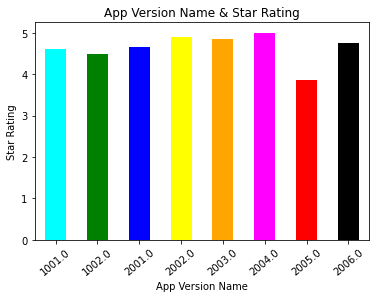

In [ ]:
app_ver = pd_rev.groupby('App Version Name')['Star Rating'].mean().reset_index()
plt.figure(figsize = (5,7))
ax = app_ver.plot(kind='bar',x='App Version Name', y='Star Rating', color=['cyan','green','blue','yellow','orange','magenta','red','black'], legend=None)
plt.title('App Version Name & Star Rating')
plt.xlabel('App Version Name')
plt.xticks(rotation=40)
plt.ylabel('Star Rating')
plt.show()

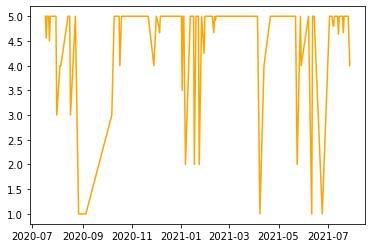

In [ ]:
rev_date = pd_rev.groupby(by=pd_rev['Review Last Update Date and Time'].dt.date)['Star Rating'].mean().reset_index()
plt.plot(rev_date['Review Last Update Date and Time'], rev_date['Star Rating'], color='orange')
plt.show()

Insight:
* The lowest rating occurs on version 2005.0 (< 4.0)
* The highest rating occurs on version 2004.0 (close to 5.0)

### Why has BISA AI app version 2005 been the lowest rating score?

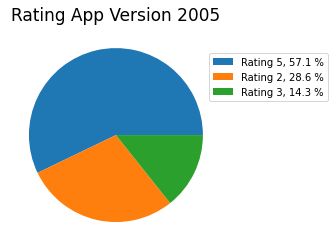

In [ ]:
rev_non_empty = pd_rev[pd_rev['App Version Name'] == 2005.0].groupby("Star Rating").count().sort_values('Review Text',ascending=None).reset_index()
plt.pie(rev_non_empty['Review Text'])
labels=rev_non_empty['Star Rating'].astype('int64')
percents = rev_non_empty['Review Text'].to_numpy() * 100 / rev_non_empty['Review Text'].to_numpy().sum() #bbox_to_anchor=(1.35,1.1)
plt.legend(bbox_to_anchor=(1.5,0.9), loc='upper right',
            labels=['Rating %s, %1.1f %%' % (l, s) for l, s in zip(labels,percents)])
plt.title("Rating App Version 2005", fontsize=17)
plt.rcParams['axes.facecolor'] = 'none'
plt.show()

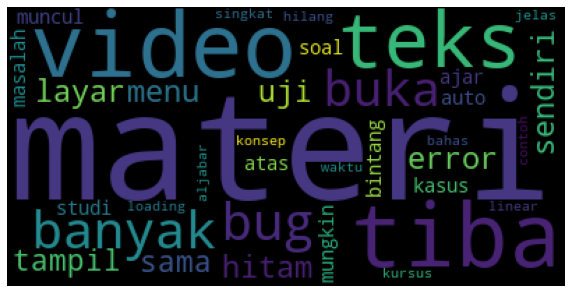

In [ ]:
text = pd_rev[(pd_rev['App Version Name'] == 2005.0) & (pd_rev['Star Rating'] <= 3)]


wordcloud = WordCloud().generate(' '.join(text['Review'].sum()))

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Insight:
* More than 40% people voted below 4.0 for this version
* From the WordCloud, I can find: "video", "teks, "materi", "tiba-tiba", "bug", "hitam" means there are technical problems occur in this version, such that bug like black screen while video and material are opening. Also, somehow the application is crashed suddenly on the phone

### How is percentage for each star rating for user with text review?

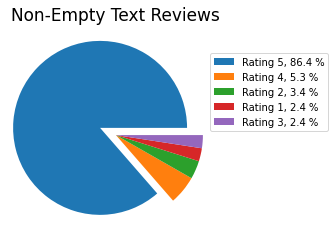

In [ ]:
rev_non_empty = pd_rev[mask].groupby("Star Rating").count().sort_values('Review Text',ascending=None).reset_index()
explode = [0.2, 0, 0, 0, 0]
plt.pie(rev_non_empty['Review Text'], explode=explode)
labels=rev_non_empty['Star Rating'].astype('int64')
percents = rev_non_empty['Review Text'].to_numpy() * 100 / rev_non_empty['Review Text'].to_numpy().sum() #bbox_to_anchor=(1.35,1.1)
plt.legend(bbox_to_anchor=(1.5,0.9), loc='upper right',
            labels=['Rating %s, %1.1f %%' % (l, s) for l, s in zip(labels,percents)])
plt.title("Non-Empty Text Reviews", fontsize=17)
plt.rcParams['axes.facecolor'] = 'none'
plt.show()

Insight:

* This is for users who fills the text reviews (either Bahasa Indonesia or English)
* More than 90% users gives rating 4 or 5 to this application
* Less than 5% users gives lower rating or not many people are disappointed with BISA AI application

### How is percentage for each star rating for user with empty text review?

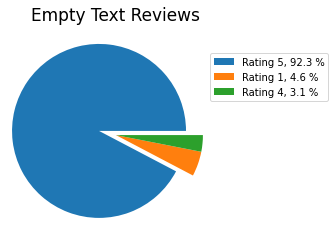

In [ ]:
rev_empty = pd_rev[mask_none].groupby("Star Rating").count().sort_values('Review Text',ascending=None).reset_index()
explode = [0.2, 0, 0]
plt.pie(rev_empty['Review Text'], explode=explode)
labels=rev_empty['Star Rating'].astype('int64')
percents = rev_empty['Review Text'].to_numpy() * 100 / rev_empty['Review Text'].to_numpy().sum() #bbox_to_anchor=(1.35,1.1)
plt.legend(bbox_to_anchor=(1.5,0.9), loc='upper right',
            labels=['Rating %s, %1.1f %%' % (l, s) for l, s in zip(labels,percents)])
plt.title("Empty Text Reviews", fontsize=17)
plt.rcParams['axes.facecolor'] = 'none'
plt.show()

Insight:
* This is for users who did not fill the text reviews (only gives rating)
* Similar with users with text reviews, more than 90% users like this application with rating 5 or 4
* Less than 5% users dislike this application
* There is no user in this empty text reviews who give rating 3

### What is the most frequent words for non-empty text reviews?

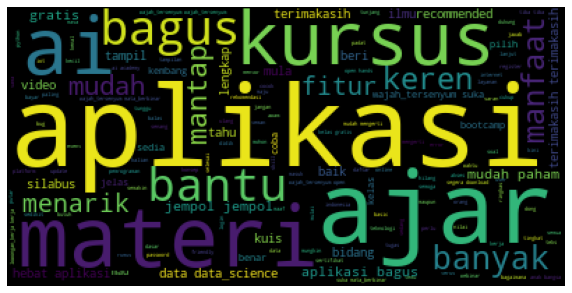

In [ ]:
text = pd_rev[mask]

wordcloud = WordCloud().generate(' '.join(text['Review'].sum()))

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* "Aplikasi", "kursus", "bagus", "ai", "ajar", "materi", "bantu", "menarik", "keren" has been top comments for BISA AI application (in English: "application", "course", "good", "ai", "learn/learning", "material", "helpful", "interesting", "cool")
* Most of users are interested in BISA AI application through its courses and learning materials
* Most of users learn AI (Artificial Intelligence) and Data Science through this application

### What are top 10 most frequent words for each star rating?

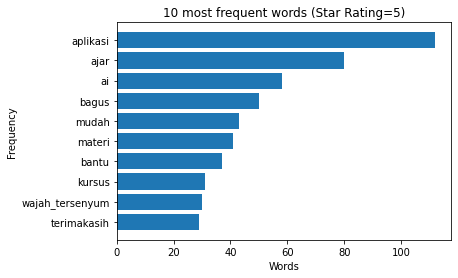

In [ ]:
text = pd_rev[(mask) & (pd_rev['Star Rating']==5.0)]
description_list = text['Review'].values.tolist()

import itertools

# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(itertools.chain(*description_list)).most_common(10)
#word_frequency = Counter(''.join(description_list)).most_common(10)

# 'most_common' returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.barh(words[::-1], counts[::-1])
plt.title("10 most frequent words (Star Rating=5)")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

Insight:
* (English): "application", "learn/learning", "ai/artificial intelligence", "good", "easy", "material", "helpful", "course", "smiling_face", "thank you"
* Based on users who gives rating=5.0, they feel blessed with th existence of BISA AI application which is helpful, easy to learn, and provide many courses
* Furthermore, most of people who downloaded this app want to learn AI (Artificial Intelligence)

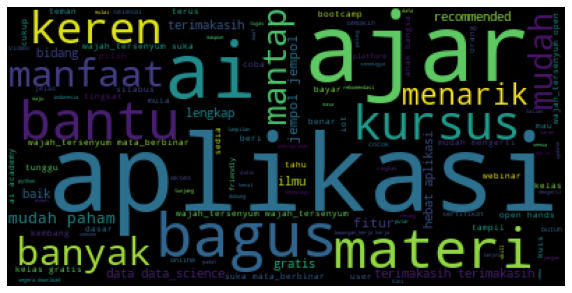

In [ ]:
text = pd_rev[(mask) & (pd_rev['Star Rating']==5.0)]
wordcloud = WordCloud().generate(' '.join(text['Review'].sum()))

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

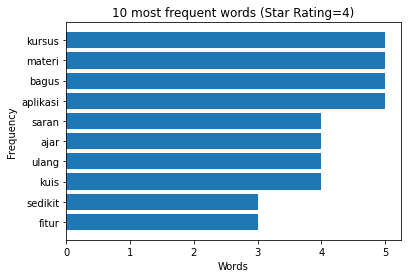

In [ ]:
# Star Rating = 4
text = pd_rev[(mask) & (pd_rev['Star Rating']==4.0)]
description_list = text['Review'].values.tolist()

import itertools

# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(itertools.chain(*description_list)).most_common(10)
#word_frequency = Counter(''.join(description_list)).most_common(10)

# 'most_common' returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.barh(words[::-1], counts[::-1])
plt.title("10 most frequent words (Star Rating=4)")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

Insight:
* (English): "course", "material", "good", "application", "suggestion/advice", "learning/learn", "repeat", "quiz", "less", "feature"
* Based on users who gives rating=4.0, most of words are positive words like users who gives rating=5.0
* In addition, there are some complaints and suggestions: the quizzes can not be repeated and less features given from the application

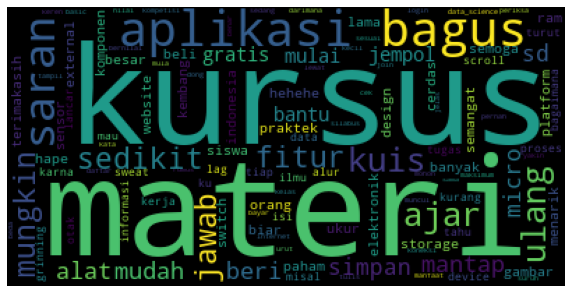

In [ ]:
text = pd_rev[(mask) & (pd_rev['Star Rating']==4.0)]
wordcloud = WordCloud().generate(' '.join(text['Review'].sum()))

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

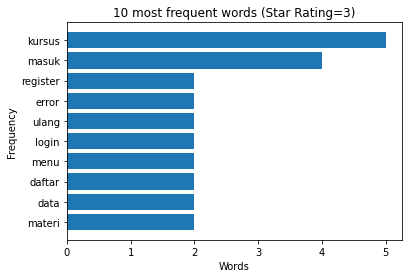

In [ ]:
# Star Rating = 3
text = pd_rev[(mask) & (pd_rev['Star Rating']==3.0)]
description_list = text['Review'].values.tolist()

import itertools

# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(itertools.chain(*description_list)).most_common(10)
#word_frequency = Counter(''.join(description_list)).most_common(10)

# 'most_common' returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.barh(words[::-1], counts[::-1])
plt.title("10 most frequent words (Star Rating=3)")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

Insight:
* (English): "course", "enter/login", "register", "error", "repeat", "login", "repeat", "menu", "list", "data", "material"
* Based on users who gives rating=3.0, I start to find complaints start from this rate
* Most of users complaint of login and register error from BISA AI application
* Most of users complain of difficulties in entering their data to the application

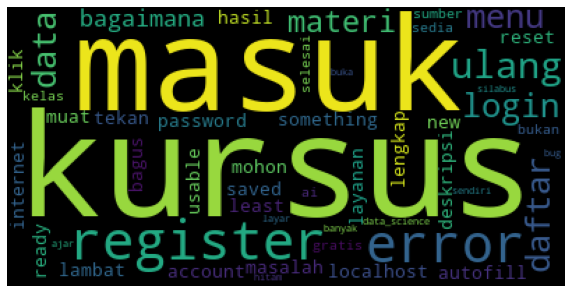

In [ ]:
text = pd_rev[(mask) & (pd_rev['Star Rating']==3.0)]
wordcloud = WordCloud().generate(' '.join(text['Review'].sum()))

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

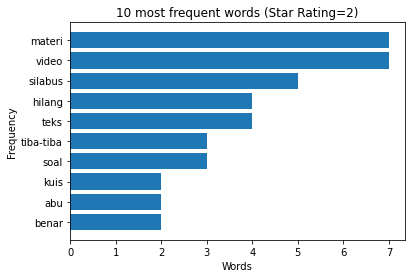

In [ ]:
# Star Rating = 2
text = pd_rev[(mask) & (pd_rev['Star Rating']==2.0)]
description_list = text['Review'].values.tolist()

import itertools

# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(itertools.chain(*description_list)).most_common(10)
#word_frequency = Counter(''.join(description_list)).most_common(10)

# 'most_common' returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.barh(words[::-1], counts[::-1])
plt.title("10 most frequent words (Star Rating=2)")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

Insight:
* (English): "material", "video", "syllabus", "lost", "text", "suddenly", "problem", "quiz", "grey", "true"
* Based on users who gives rating=2.0, many complaints are found
* Users are complaining about sudden lost of text and video from material in BISA AI application
* Users are complaining about "grey area" in the true answers of the quiz problems which led to double true answers in multiple choices from quiz 

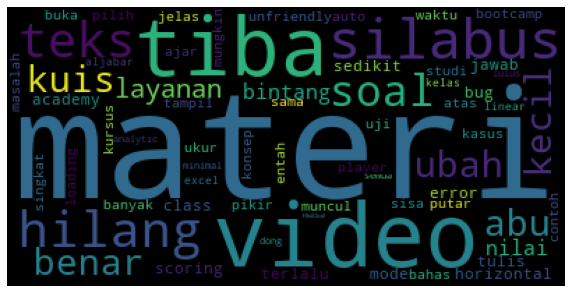

In [ ]:
text = pd_rev[(mask) & (pd_rev['Star Rating']==2.0)]
wordcloud = WordCloud().generate(' '.join(text['Review'].sum()))

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

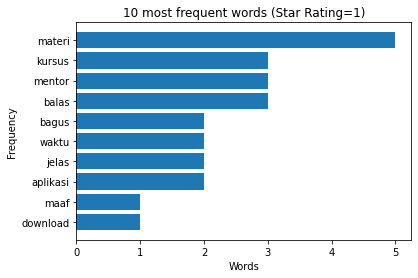

In [ ]:
# Star Rating = 1
text = pd_rev[(mask) & (pd_rev['Star Rating']==1.0)]
description_list = text['Review'].values.tolist()

import itertools

# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(itertools.chain(*description_list)).most_common(10)
#word_frequency = Counter(''.join(description_list)).most_common(10)

# 'most_common' returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.barh(words[::-1], counts[::-1])
plt.title("10 most frequent words (Star Rating=1)")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

Insight:
* (English): "material", "course", "mentor", "reply", "good", "time", "clear", "application", "sorry", "download"
* Based on users who gives rating=1.0, I found a new critic compared to users who gives rating=2.0
* There are users who contacted the mentor but did not receive a reply from the mentor which makes them feel regret of downloading BISA AI application
* There are complaints about material from BISA AI Academy compared to Youtube materials
* Uniquely, I found praise also from this rating: the material is well explained

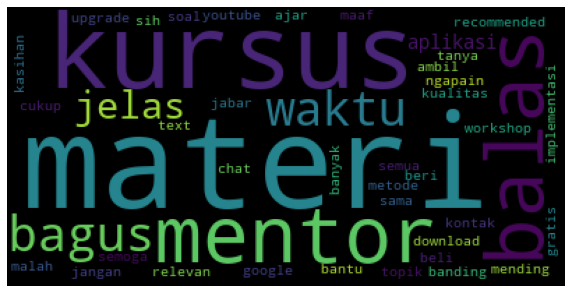

In [ ]:
text = pd_rev[(mask) & (pd_rev['Star Rating']==1.0)]
wordcloud = WordCloud().generate(' '.join(text['Review'].sum()))

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **Feature Engineering**

In [ ]:
pd_pred = pd.read_csv('/content/drive/MyDrive/OJT BISA AI/cleaned_pred.csv')
# this should convert the POS_tags column from strings to python lists:
from ast import literal_eval
pd_pred['Review'] = pd_pred['Review'].apply(literal_eval)
pd_pred.head()

,Review,Star Rating
0,"[hebat, aplikasi, ajar, ai, online]",5.0
1,"[manfaat, ajar, online, materi, ai]",5.0
2,"[aplikasi, bagus, bantu, ajar]",5.0
3,"[hebat, aplikasi, friendly, user, interface, m...",5.0
4,"[bagus, mula, mau, lanjut, tahap, expert, apli...",5.0


In [ ]:
pd_pred.groupby('Star Rating').count().reset_index()

,Star Rating,Review
0,1.0,5
1,2.0,7
2,3.0,5
3,4.0,11
4,5.0,177


I choose multiclass classification for sentiment analysis: Negative (-1), Neutral (0), and Positive (1)

In [ ]:
# Multi
sentiment = []
for i in pd_pred['Star Rating']:
  if i >= 4:
    sentiment.append(int(1))
  elif i==3:
    sentiment.append(int(0))
  else:
    sentiment.append(int(-1))
print(sentiment)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, -1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
pd_pred['Sentiment'] = sentiment
pd_pred.head()

,Review,Star Rating,Sentiment
0,"[hebat, aplikasi, ajar, ai, online]",5.0,1
1,"[manfaat, ajar, online, materi, ai]",5.0,1
2,"[aplikasi, bagus, bantu, ajar]",5.0,1
3,"[hebat, aplikasi, friendly, user, interface, m...",5.0,1
4,"[bagus, mula, mau, lanjut, tahap, expert, apli...",5.0,1


In [ ]:
pd_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Review       205 non-null    object 
 1   Star Rating  205 non-null    float64
 2   Sentiment    205 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.9+ KB


In [ ]:
# Untuk reset saja
del pd_pred['Star Rating']
pd_pred.head()

,Review,Sentiment
0,"[hebat, aplikasi, ajar, ai, online]",1
1,"[manfaat, ajar, online, materi, ai]",1
2,"[aplikasi, bagus, bantu, ajar]",1
3,"[hebat, aplikasi, friendly, user, interface, m...",1
4,"[bagus, mula, mau, lanjut, tahap, expert, apli...",1


In [ ]:
pd_pred.to_csv('pd_pred_multi.csv', index=False)

In [ ]:
!cp 'pd_pred_multi.csv' '/content/drive/MyDrive/OJT BISA AI'

# **Data Preparation**

## Train Test Split

In [ ]:
pd_pred_multi = pd.read_csv('/content/drive/MyDrive/OJT BISA AI/pd_pred_multi.csv')
# this should convert the POS_tags column from strings to python lists:
from ast import literal_eval
pd_pred_multi['Review'] = pd_pred_multi['Review'].apply(literal_eval)
pd_pred_multi.head()

,Review,Sentiment
0,"[hebat, aplikasi, ajar, ai, online]",1
1,"[manfaat, ajar, online, materi, ai]",1
2,"[aplikasi, bagus, bantu, ajar]",1
3,"[hebat, aplikasi, friendly, user, interface, m...",1
4,"[bagus, mula, mau, lanjut, tahap, expert, apli...",1


In [ ]:
# Separate features and target variables
X_multi = pd_pred_multi[['Review']]
y_multi = pd_pred_multi["Sentiment"]
X_multi.head()

,Review
0,"[hebat, aplikasi, ajar, ai, online]"
1,"[manfaat, ajar, online, materi, ai]"
2,"[aplikasi, bagus, bantu, ajar]"
3,"[hebat, aplikasi, friendly, user, interface, m..."
4,"[bagus, mula, mau, lanjut, tahap, expert, apli..."


In [ ]:
from collections import Counter

from sklearn.model_selection import train_test_split

# split into train test sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.30, random_state=42, stratify=y_multi)

print('Class from training data',Counter(y_train_multi))

print('Class from testing data',Counter(y_test_multi))

Class from training data Counter({1: 131, -1: 8, 0: 4})
Class from testing data Counter({1: 57, -1: 4, 0: 1})


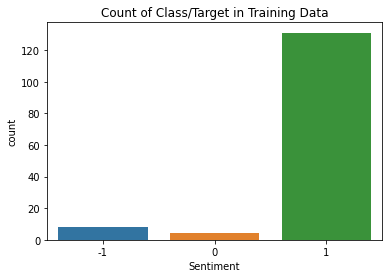

In [ ]:
import seaborn as sns
plt.title('Count of Class/Target in Training Data')
sns.countplot(y_train_multi);

I cannot use accuracy as the main metric because of severe imbalanced class in this dataset

## Feature Extraction

In [ ]:
v = TfidfVectorizer()
x_train_multi = v.fit_transform(X_train_multi['Review'].apply(lambda x: ' '.join(x)))
# Apply transform to test set to avoid data leakage
x_test_multi = v.transform(X_test_multi['Review'].apply(lambda x: ' '.join(x)))

In [ ]:
print('Training set:',x_train_multi.shape)
print('Testing set:',x_test_multi.shape)

Training set: (143, 366)
Testing set: (62, 366)


In [ ]:
tfidf_multi_train = pd.DataFrame(x_train_multi.toarray(), columns=v.get_feature_names())
tfidf_multi_train.describe()

,abu,academy,account,admin,advance,ai,ajar,akomodasi,akses,alat,alhamdulillah,alur,ambil,anak,analyst,analytic,aplikasi,autofill,awam,ayo,baca,background,bagaimana,bagus,bahas,bahasa,bahkan,baik,balas,banding,bangsa,bantu,banyak,basic,bayar,beasiswa,beda,beli,benar,beri,bernilai,besar,biar,biasa,bidang,bintang,bluestacks,bootcamp,budget,bug,buka,bukan,butuh,cek,cerdas,chat,class,coba,cocok,coding,cukup,daftar,darimana,dasar,data,data_science,deskripsi,device,didik,digital,diskusi,dong,download,dukung,education,efektif,eh,elektronik,error,event,excel,experience,expert,external,final,fire,fitur,freelance,friendly,gambar,giveaway,google,gratis,grinning,gudang,guys,hadiah,halang,hape,harga,hari,hasil,hebat,hehehe,hilang,hingga,hitam,horizontal,humble,id,ilmu,implementasi,indonesia,informasi,instagram,install,instruktur,intelligence,internet,iot,it,jabar,jangan,jangkau,jawab,jelas,jempol,join,jujur,kalah,kalian,kamu,kapan,karir,karna,karya,kasihan,kata,kecil,kelas,kemarin,kembang,kemudian,kenal,keren,kerja,keseluruhan,kini,klik,knowledge,kompeten,kompetisi,komponen,kondisi,koneksi,konsep,kontak,ku,kualitas,kuis,kuliah,kumpul,kurang,kursus,lag,lama,lambat,lancar,landscape,lanjut,layanan,layar,least,lega,lengkap,lewat,lho,lintas,localhost,login,lowongan_kerja,luar,luas,lulus,lumayan,maaf,machine_learning,mahal,mahasiswa,maksimum,malah,mampu,manfaat,mantap,masa,masalah,masuk,masyarakat,mata_berbinar,materi,material,mau,maupun,media,menarik,mending,mengerti,mentor,menu,metode,micro,milik,minimal,misal,mode,mohon,muat,mudah,mula,mulai,muncul,mungkin,nambah,new,ngapain,nilai,oke,online,orang,otak,otodidak,padat,paham,paling,pandemi,password,patut,pemrograman,pensive,periksa,perlu,permisi,pernah,pikir,pilih,platform,praktek,pribadi,privat,produk,programing,programming,project,putar,python,ram,ready,recommended,register,relasi,relevan,reset,ringkas,rotate,rumit,rumus,saji,sama,saran,saved,scoring,scroll,sd,sedang,sederhana,sedia,sedih,sedikit,segera,sekolah,selesai,self,semakin,semangat,semoga,semua,senang,sendiri,sensor,sertifikat,sesal,sesuai,sih,silabus,simpan,singkat,sistem,siswa,situ,skill,skripsi,soal,something,storage,struktur,suka,sumber,suruh,sweat,switch,tahap,tahu,tampil,tanya,tawar,tekan,teknologi,teman,tempat,temu,tepat,terang,terap,terimakasih,terjun,terlalu,terus,text,things,tiap,tim,tingkat,topik,training,tugas,tulis,tunggu,tunjang,turut,uang,ubah,ukur,ulang,umum,understanding,unduh,unfriendly,unik,update,upgrade,upload,urut,usable,user,video,viral,wadah,wah,wajah_tersenyum,waktu,webinar,working,workshop,yakin,youtube,zaman
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,14

## Feature Scaling

In [ ]:
scaler = StandardScaler(with_mean = False)
x_train_multi = scaler.fit_transform(x_train_multi)
# Transform the test set only to avoid data leakage
x_test_multi = scaler.transform(x_test_multi)

# **Modelling**

* I focus on recall from non positive class (-1 or 0) to give evaluation for BISA AI Application
* Furthermore, I check the confusion matrix

Modelling:
* Naive Bayes
* Random Forest
* Gradient Boosting Trees
* Support Vector Machine

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Naive Bayes Classifier

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

X = X_multi['Review'].apply(lambda x: ' '.join(x))
y = y_multi.copy()

mnb_pipeline = Pipeline([
    ('tfidf_pipeline', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean = False)),
    ('mnb', MultinomialNB())
])

grid_params = {
  'mnb__alpha': np.linspace(0.5, 1.5, 6),
  'mnb__fit_prior': [True, False]
}

clf = RandomizedSearchCV(mnb_pipeline, grid_params, n_iter=100, cv=5, random_state=42)
model = clf.fit(X, y)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.9121951219512197
Best Params:  {'mnb__fit_prior': True, 'mnb__alpha': 0.9}


### Overfit/Underfit Checking

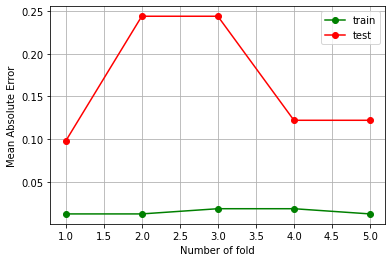

In [ ]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error

scores_train = []
scores_test = []

lr = MultinomialNB(fit_prior=True,alpha=0.9)
s = StandardScaler(with_mean = False)

kf = KFold(shuffle=True,random_state=42, n_splits=5) #random_state equals to previous train_test_split
# shuffle=True

for train_index, test_index in kf.split(X_multi):
  x_train = X_multi.take(list(train_index),axis=0)
  x_test = X_multi.take(list(test_index),axis=0)
  y_train, y_test = y_multi.take(list(train_index),axis=0), y_multi.take(list(test_index),axis=0)
  # Feature extraction: TF-IDF
  tfidf = TfidfVectorizer()
  x_train = tfidf.fit_transform(x_train['Review'].apply(lambda x: ' '.join(x)))
  x_test = tfidf.transform(x_test['Review'].apply(lambda x: ' '.join(x)))
  # Standard Scaler
  X_train = s.fit_transform(x_train)
  X_test = s.transform(x_test)
  # Train the training data
  lr.fit(X_train.toarray(), y_train)
  # Predict training and testing
  y_train_pred = lr.predict(X_train.toarray())
  y_pred = lr.predict(X_test.toarray())
  # Evaluating training and testing
  score_train = mean_absolute_error(y_train.values, y_train_pred)
  score_test = mean_absolute_error(y_test.values, y_pred)
  scores_train.append(score_train)
  scores_test.append(score_test)

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='train')
plt.plot(folds, scores_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

### Evaluation

Training is success!
Classification report Naive Bayes Classifier : 
               precision    recall  f1-score   support

          -1       0.43      0.75      0.55         4
           0       0.33      1.00      0.50         1
           1       1.00      0.91      0.95        57

    accuracy                           0.90        62
   macro avg       0.59      0.89      0.67        62
weighted avg       0.95      0.90      0.92        62



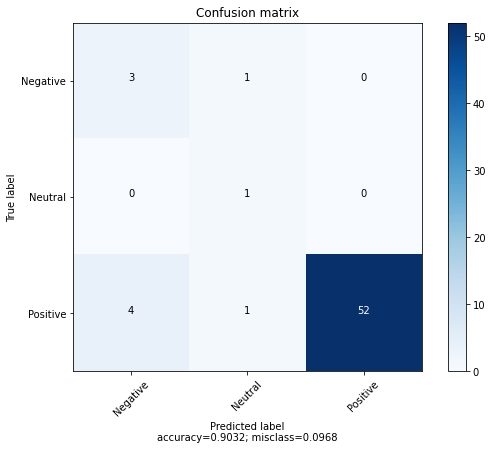

In [ ]:
model_NB = MultinomialNB(fit_prior=True,alpha=0.9) #Multiclass NB
model_NB.fit(x_train_multi.toarray(), y_train_multi) 
print("Training is success!")
predicted = model_NB.predict(x_test_multi.toarray())
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test_multi, predicted)
print('Classification report Naive Bayes Classifier : \n',matrix)
cm = confusion_matrix(y_test_multi, predicted)
target_names = ["Negative","Neutral","Positive"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,
                          normalize=False)

In [ ]:
misclassified_samples = X_test_multi[y_test_multi != predicted]
misclassified_samples['Sentiment_Predicted'] = predicted[y_test_multi != predicted]
misclassified_samples['Sentiment_True'] = y_test_multi[y_test_multi != predicted]
misclassified_samples

,Review,Sentiment_Predicted,Sentiment_True
118,"[aplikasi, mudah, tampil, bagus, menarik, mate...",-1,1
21,"[bagus, materi, mudah, paham, baik, perlu, bai...",-1,1
43,"[mohon, maaf, kursus, dasar, python, silabus, ...",-1,1
82,"[silabus, buka]",0,-1
56,"[masuk, kursus, video, display, hilang, benar,...",-1,1
13,"[aplikasi, bantu, ajar, kursus, selalu, bayar,...",0,1


## Random Forest Classifier

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

X = X_multi['Review'].apply(lambda x: ' '.join(x))
y = y_multi.copy()

mnb_pipeline = Pipeline([
    ('tfidf_pipeline', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean = False)),
    ('mnb', RandomForestClassifier())
])

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

grid_params = {
               'mnb__n_estimators': n_estimators,
               'mnb__max_features': max_features,
               'mnb__max_depth': max_depth,
               'mnb__min_samples_split': min_samples_split,
               'mnb__min_samples_leaf': min_samples_leaf,
               'mnb__bootstrap': bootstrap  
}

clf = RandomizedSearchCV(mnb_pipeline, grid_params, n_iter=100, cv=5, random_state=42)
model = clf.fit(X, y)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.921951219512195
Best Params:  {'mnb__n_estimators': 800, 'mnb__min_samples_split': 5, 'mnb__min_samples_leaf': 1, 'mnb__max_features': 'sqrt', 'mnb__max_depth': 90, 'mnb__bootstrap': False}


### Overfit/Underfit Checking

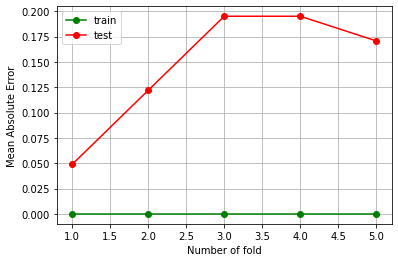

In [ ]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error

scores_train = []
scores_test = []

lr = RandomForestClassifier(n_estimators=800,min_samples_split=5,min_samples_leaf=1,
                                  max_features='sqrt',max_depth=90,bootstrap=False)
s = StandardScaler(with_mean = False)

kf = KFold(shuffle=True,random_state=42, n_splits=5) #random_state equals to previous train_test_split
# shuffle=True

for train_index, test_index in kf.split(X_multi):
  x_train = X_multi.take(list(train_index),axis=0)
  x_test = X_multi.take(list(test_index),axis=0)
  y_train, y_test = y_multi.take(list(train_index),axis=0), y_multi.take(list(test_index),axis=0)
  # Feature extraction: TF-IDF
  tfidf = TfidfVectorizer()
  x_train = tfidf.fit_transform(x_train['Review'].apply(lambda x: ' '.join(x)))
  x_test = tfidf.transform(x_test['Review'].apply(lambda x: ' '.join(x)))
  # Standard Scaler
  X_train = s.fit_transform(x_train)
  X_test = s.transform(x_test)
  # Train the training data
  lr.fit(X_train.toarray(), y_train)
  # Predict training and testing
  y_train_pred = lr.predict(X_train.toarray())
  y_pred = lr.predict(X_test.toarray())
  # Evaluating training and testing
  score_train = mean_absolute_error(y_train.values, y_train_pred)
  score_test = mean_absolute_error(y_test.values, y_pred)
  scores_train.append(score_train)
  scores_test.append(score_test)

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='train')
plt.plot(folds, scores_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

### Evaluation

Training is success!
Classification report Random Forest Classifier : 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.00      0.00      0.00         1
           1       0.92      1.00      0.96        57

    accuracy                           0.92        62
   macro avg       0.31      0.33      0.32        62
weighted avg       0.85      0.92      0.88        62



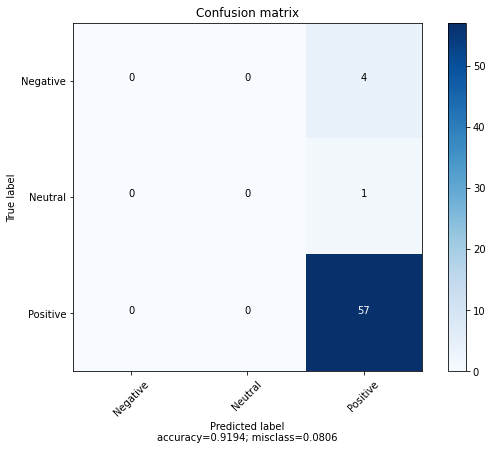

In [ ]:
model_RF = RandomForestClassifier(n_estimators=800,min_samples_split=5,min_samples_leaf=1,
                                  max_features='sqrt',max_depth=90,bootstrap=False)
model_RF.fit(x_train_multi.toarray(), y_train_multi) 
print("Training is success!")
predicted = model_RF.predict(x_test_multi.toarray())
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test_multi, predicted)
print('Classification report Random Forest Classifier : \n',matrix)
cm = confusion_matrix(y_test_multi, predicted)
target_names = ["Negative","Neutral","Positive"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,
                          normalize=False)

In [ ]:
misclassified_samplesRF = X_test_multi[y_test_multi != predicted]
misclassified_samplesRF['Sentiment_Predicted'] = predicted[y_test_multi != predicted]
misclassified_samplesRF['Sentiment_True'] = y_test_multi[y_test_multi != predicted]
misclassified_samplesRF

,Review,Sentiment_Predicted,Sentiment_True
74,"[entah, video, materi, putar, video, player, t...",1,-1
85,"[video, materi, tampil, sama, teks, uji, muncu...",1,-1
36,"[daftar, kelas, data, data_science, masuk, sil...",1,0
88,"[video, loading, tiba-tiba, tiba-tiba, hilang,...",1,-1
82,"[silabus, buka]",1,-1


## Gradient Boosting Trees Classifier

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
X = X_multi['Review'].apply(lambda x: ' '.join(x))
y = y_multi.copy()

mnb_pipeline = Pipeline([
    ('tfidf_pipeline', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean = False)),
    ('mnb', GradientBoostingClassifier())
])


grid_params = {
               "mnb__learning_rate": sp_randFloat(),
               "mnb__subsample"    : sp_randFloat(),
               "mnb__n_estimators" : sp_randInt(100, 1000),
               "mnb__max_depth"    : sp_randInt(4, 10)  
}

clf = RandomizedSearchCV(mnb_pipeline, grid_params, n_iter=100, cv=5, random_state=42)
model = clf.fit(X, y)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.9365853658536585
Best Params:  {'mnb__learning_rate': 0.5924145688620425, 'mnb__max_depth': 6, 'mnb__n_estimators': 584, 'mnb__subsample': 0.6075448519014384}


### Overfit/Underfit Checking

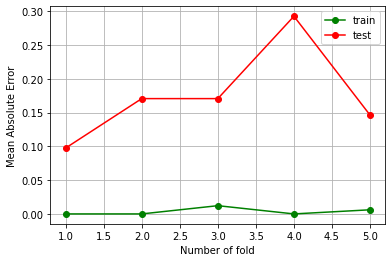

In [ ]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error

scores_train = []
scores_test = []

lr = GradientBoostingClassifier(learning_rate=0.5924145688620425, max_depth=6,
                                      n_estimators=584, subsample=0.6075448519014384)
s = StandardScaler(with_mean = False)

kf = KFold(shuffle=True,random_state=42, n_splits=5) #random_state equals to previous train_test_split
# shuffle=True

for train_index, test_index in kf.split(X_multi):
  x_train = X_multi.take(list(train_index),axis=0)
  x_test = X_multi.take(list(test_index),axis=0)
  y_train, y_test = y_multi.take(list(train_index),axis=0), y_multi.take(list(test_index),axis=0)
  # Feature extraction: TF-IDF
  tfidf = TfidfVectorizer()
  x_train = tfidf.fit_transform(x_train['Review'].apply(lambda x: ' '.join(x)))
  x_test = tfidf.transform(x_test['Review'].apply(lambda x: ' '.join(x)))
  # Standard Scaler
  X_train = s.fit_transform(x_train)
  X_test = s.transform(x_test)
  # Train the training data
  lr.fit(X_train.toarray(), y_train)
  # Predict training and testing
  y_train_pred = lr.predict(X_train.toarray())
  y_pred = lr.predict(X_test.toarray())
  # Evaluating training and testing
  score_train = mean_absolute_error(y_train.values, y_train_pred)
  score_test = mean_absolute_error(y_test.values, y_pred)
  scores_train.append(score_train)
  scores_test.append(score_test)

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='train')
plt.plot(folds, scores_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

### Evaluation

Training is success!
Classification report Gradient Boosting Trees Classifier : 
               precision    recall  f1-score   support

          -1       1.00      0.25      0.40         4
           0       0.00      0.00      0.00         1
           1       0.93      1.00      0.97        57

    accuracy                           0.94        62
   macro avg       0.64      0.42      0.46        62
weighted avg       0.92      0.94      0.91        62



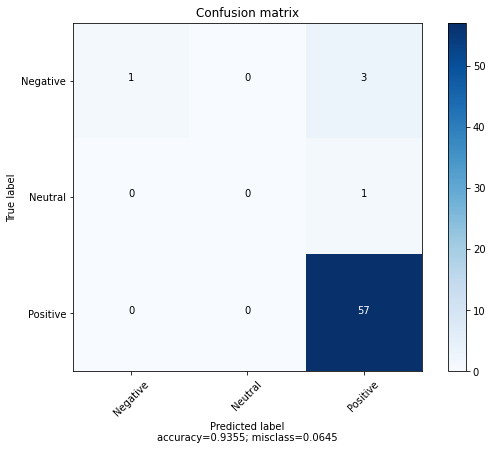

In [ ]:
model_GB =GradientBoostingClassifier(learning_rate=0.5924145688620425, max_depth=6,
                                      n_estimators=584, subsample=0.6075448519014384)
model_GB.fit(x_train_multi.toarray(), y_train_multi) 
print("Training is success!")
predicted = model_GB.predict(x_test_multi.toarray())
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test_multi, predicted)
print('Classification report Gradient Boosting Trees Classifier : \n',matrix)
cm = confusion_matrix(y_test_multi, predicted)
target_names = ["Negative","Neutral","Positive"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,
                          normalize=False)

In [ ]:
misclassified_samplesGB = X_test_multi[y_test_multi != predicted]
misclassified_samplesGB['Sentiment_Predicted'] = predicted[y_test_multi != predicted]
misclassified_samplesGB['Sentiment_True'] = y_test_multi[y_test_multi != predicted]
misclassified_samplesGB

,Review,Sentiment_Predicted,Sentiment_True
74,"[entah, video, materi, putar, video, player, t...",1,-1
36,"[daftar, kelas, data, data_science, masuk, sil...",1,0
21,"[bagus, materi, mudah, paham, baik, perlu, bai...",-1,1
88,"[video, loading, tiba-tiba, tiba-tiba, hilang,...",1,-1
82,"[silabus, buka]",1,-1


## Support Vector Machine Classifier

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

X = X_multi['Review'].apply(lambda x: ' '.join(x))
y = y_multi.copy()

mnb_pipeline = Pipeline([
    ('tfidf_pipeline', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean = False)),
    ('mnb', svm.SVC())
])


grid_params = {
              "mnb__kernel":['rbf','sigmoid'],
              'mnb__gamma':[1e-2, 1e-3, 1e-4, 1e-5],
              'mnb__C':[0.001, 0.10, 0.0001,0.00001]  
}

clf = RandomizedSearchCV(mnb_pipeline, grid_params, n_iter=100, cv=5, random_state=42)
model = clf.fit(X, y)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.9170731707317075
Best Params:  {'mnb__kernel': 'rbf', 'mnb__gamma': 0.01, 'mnb__C': 0.001}


### Overfit/Underfit Checking

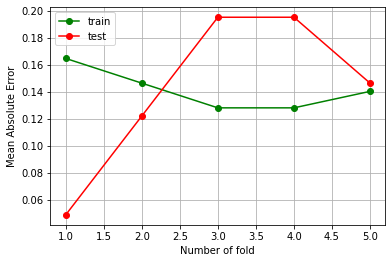

In [ ]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error

scores_train = []
scores_test = []

lr = svm.SVC(kernel='rbf',gamma=0.01,C=0.001)
s = StandardScaler(with_mean = False)

kf = KFold(shuffle=True,random_state=42, n_splits=5) #random_state equals to previous train_test_split
# shuffle=True

for train_index, test_index in kf.split(X_multi):
  x_train = X_multi.take(list(train_index),axis=0)
  x_test = X_multi.take(list(test_index),axis=0)
  y_train, y_test = y_multi.take(list(train_index),axis=0), y_multi.take(list(test_index),axis=0)
  # Feature extraction: TF-IDF
  tfidf = TfidfVectorizer()
  x_train = tfidf.fit_transform(x_train['Review'].apply(lambda x: ' '.join(x)))
  x_test = tfidf.transform(x_test['Review'].apply(lambda x: ' '.join(x)))
  # Standard Scaler
  X_train = s.fit_transform(x_train)
  X_test = s.transform(x_test)
  # Train the training data
  lr.fit(X_train.toarray(), y_train)
  # Predict training and testing
  y_train_pred = lr.predict(X_train.toarray())
  y_pred = lr.predict(X_test.toarray())
  # Evaluating training and testing
  score_train = mean_absolute_error(y_train.values, y_train_pred)
  score_test = mean_absolute_error(y_test.values, y_pred)
  scores_train.append(score_train)
  scores_test.append(score_test)

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='train')
plt.plot(folds, scores_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

### Evaluation

Training is success!
Classification report Support Vector Machine Classifier : 
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.00      0.00      0.00         1
           1       0.92      1.00      0.96        57

    accuracy                           0.92        62
   macro avg       0.31      0.33      0.32        62
weighted avg       0.85      0.92      0.88        62



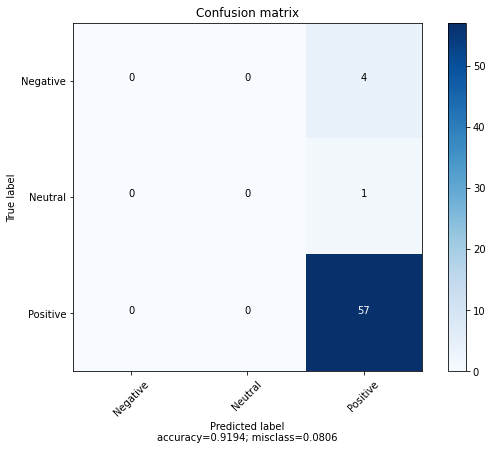

In [ ]:
model_SVM = svm.SVC(kernel='rbf',gamma=0.01,C=0.001)
model_SVM.fit(x_train_multi.toarray(), y_train_multi) 
print("Training is success!")
predicted = model_SVM.predict(x_test_multi.toarray())
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test_multi, predicted)
print('Classification report Support Vector Machine Classifier : \n',matrix)
cm = confusion_matrix(y_test_multi, predicted)
target_names = ["Negative","Neutral","Positive"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,
                          normalize=False)

In [ ]:
misclassified_samplesSVM = X_test_multi[y_test_multi != predicted]
misclassified_samplesSVM['Sentiment_Predicted'] = predicted[y_test_multi != predicted]
misclassified_samplesSVM['Sentiment_True'] = y_test_multi[y_test_multi != predicted]
misclassified_samplesSVM

,Review,Sentiment_Predicted,Sentiment_True
74,"[entah, video, materi, putar, video, player, t...",1,-1
85,"[video, materi, tampil, sama, teks, uji, muncu...",1,-1
36,"[daftar, kelas, data, data_science, masuk, sil...",1,0
88,"[video, loading, tiba-tiba, tiba-tiba, hilang,...",1,-1
82,"[silabus, buka]",1,-1


# **Model Selection**

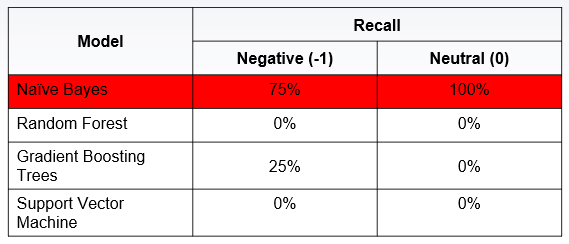

Based on its higher recall from negative and neutral, I choose Naive Bayes Classifier as our sentiment prediction model which can be deployed in the future.

# **Summary of Findings and Suggestions**

* Most of people like BISA AI Application as a free and an easy-to-use AI (Artificial Intelligence) education platform in Bahasa Indonesia
* Technical complaints: black screen, difficult to login/register, error to open video/text materials
* Non technical complaints (material): grey area of quizzes  
* Suggestion for the technical complaints: BISA AI should keep maintaining the application and give an opportunity to the users to explain more details about their complaints with give them reply, as I identified many reviews are not replied by admin
* Suggestion for the non technical complaints (material): BISA AI should reply the comment which gives an opportunity to the user to explain further about of which materials are having wrong answers. Therefore, BISA AI can check the material and revise the "grey area" answers
* For predictive modelling, I choose multiclass classification for sentiment analysis: Negative (-1), Neutral (0), and Positive (1)
* I used four machine learning models for predictive modelling: Naive Bayes, Random Forest, Gradient Boosting Trees, and Support Vector Machine. Their hyperparameters have been tuned using Randomized Search. Also, they have been checked for overfitting or underfitting using 5-Fold Validation
* I focus on recall as the main evaluation metric from non positive classes (-1 or 0) such that machine can identify the negative or neutral reviews for faster giving solutions or maintenances
* Finally, after evaluating all of the models using their recall, it can be concluded that the best model has been achieved by Naive Bayes, which leads us to the chosen model to be deployed in the future. Also, I printed the confusion matrix to ensure about how many the true negatives and true neutrals are correctly predicted
